# Seaborn stacked bar plot population in Spain by month by nationality

This script describes how to build a stacked bar plot for the population in Spain split by nationality by month and year. The set of output plots created will be saved as .jpg files in the Seaborn_gallery sub-folder

## 1. Load required libraries

In [1]:
import pandas as pd 
import os

In [2]:
# Import specific Seaborn libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = "whitegrid")

## 2. Build path to project folder

In [4]:
my_wd = os.getcwd()
print("My working directory is:",my_wd)

My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


In [5]:
python_scripts_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python')
print('Main Python project folder is:',python_scripts_folder)

Main Python project folder is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


In [6]:
# So I change current directory to /ML-using-Python so I can access the /data folder to load required .csv files
os.chdir(python_scripts_folder)
new_wd = os.getcwd()
print("Changed working directory to:",new_wd)

Changed working directory to: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


## 3.Check data folder and build path to Excel file to be imported into Python

In [7]:
# Check data folder contents
# List folder contents using os.listdir() method 
# We want to import file "INE total and foreign population figures Spain.xlsx"
data_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python','data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents:',data_folder_contents)

data folder contents: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'AE_Attendances_2010_2024.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx', '01 INE resident population by nationality Spain and CV 2002 2024.xlsx']


- We want to import Excel file "INE total and foreign population figures Spain.xlsx" into Python

- Build path to this "INE total and foreign population figures Spain.xlsx" file to be loaded into Python

In [8]:
ine_population_nationality = os.path.join('data','INE total and foreign population figures Spain.xlsx')
print('INE Spain population by nationality file:',ine_population_nationality)

INE Spain population by nationality file: data/INE total and foreign population figures Spain.xlsx


In [9]:
# First I scan the Excel tabs names, to know which tab to inmport into Python
excel_file_tabs = pd.ExcelFile(ine_population_nationality)
excel_file_tabs.sheet_names

['INE_Foreign_population',
 'INE_Total_population',
 'INE_Total_foreign_population']

## 4.Load Excel data into Python

- In this section I import "INE total and foreign population figure Spain.xlsx" Excel file into Python. I want to import just content from **INE_Total_foreign_population** tab and also I want to skip first two rows.

In [10]:
INEdata = pd.read_excel(ine_population_nationality,
                        sheet_name='INE_Total_foreign_population',
                        skiprows=2)
INEdata.head()

,Todas las edades,Total,Foreign population,% Foreign Nationals/Total population,Total YoY(N),Total YoY)(%),Foreign Nationals YoY(N),Foreign Total YoY)(%)
0,1 de enero de 2025,49077984,6852348.0,0.139622,NaN,NaN,NaN,NaN
1,1 de enero de 2024,48619695,6502282.0,0.133738,458289.0,0.009426,350066.0,0.053837
2,1 de enero de 2023,48085361,6089620.0,0.126642,534334.0,0.011112,412662.0,0.067765
3,1 de enero de 2022,47486727,5509046.0,0.116012,598634.0,0.012606,580574.0,0.105386
4,1 de enero de 2021,47400798,5402702.0,0.113979,85929.0,0.001813,106344.0,0.019683


- Subset previous imported data to keep just 20 first rows to skip footnotes

In [11]:
INE_data_clean = INEdata.head(20)
INE_data_clean.head()

,Todas las edades,Total,Foreign population,% Foreign Nationals/Total population,Total YoY(N),Total YoY)(%),Foreign Nationals YoY(N),Foreign Total YoY)(%)
0,1 de enero de 2025,49077984,6852348.0,0.139622,NaN,NaN,NaN,NaN
1,1 de enero de 2024,48619695,6502282.0,0.133738,458289.0,0.009426,350066.0,0.053837
2,1 de enero de 2023,48085361,6089620.0,0.126642,534334.0,0.011112,412662.0,0.067765
3,1 de enero de 2022,47486727,5509046.0,0.116012,598634.0,0.012606,580574.0,0.105386
4,1 de enero de 2021,47400798,5402702.0,0.113979,85929.0,0.001813,106344.0,0.019683


- Check column names

In [12]:
INE_data_clean.columns

Index(['Todas las edades', 'Total', 'Foreign population',
       '% Foreign Nationals/Total population', 'Total YoY(N)', 'Total YoY)(%)',
       'Foreign Nationals YoY(N)', 'Foreign Total YoY)(%)'],
      dtype='object')

### 4.1 Rename columns  

We will rename columns now from original names into English

In [14]:
INE_data_clean.columns = ['Date','Total_population','Foreign_population','Percent_foreign_population',
                          'Total_population YoY(N)','Total_population YoY(%)','Foreign population YoY(N)',
                          'Foreign population YoY(%)']
INE_data_clean.head()

,Date,Total_population,Foreign_population,Percent_foreign_population,Total_population YoY(N),Total_population YoY(%),Foreign population YoY(N),Foreign population YoY(%)
0,1 de enero de 2025,49077984,6852348.0,0.139622,NaN,NaN,NaN,NaN
1,1 de enero de 2024,48619695,6502282.0,0.133738,458289.0,0.009426,350066.0,0.053837
2,1 de enero de 2023,48085361,6089620.0,0.126642,534334.0,0.011112,412662.0,0.067765
3,1 de enero de 2022,47486727,5509046.0,0.116012,598634.0,0.012606,580574.0,0.105386
4,1 de enero de 2021,47400798,5402702.0,0.113979,85929.0,0.001813,106344.0,0.019683


### 4.2 Subset columns to keep just relevant variables  

- Keep just three columns "Date", "Total_population", "Foreign_population" as I want to compute Spanish nationals population by substracting "Foreign_population" from "Total_population". 

In [15]:
INE_population_subset = INE_data_clean[['Date','Total_population','Foreign_population']]
INE_population_subset.head()

,Date,Total_population,Foreign_population
0,1 de enero de 2025,49077984,6852348.0
1,1 de enero de 2024,48619695,6502282.0
2,1 de enero de 2023,48085361,6089620.0
3,1 de enero de 2022,47486727,5509046.0
4,1 de enero de 2021,47400798,5402702.0


## 5. Create new calculated fields

- From previous "INE_population_subset" dataframe, we will create new calculations: Year and Spanish nationals population.

### 5.1 New column for Year variable  

We need to extract year from Date variable in INE_population_subset dataframe. We use **str.strip()** function applied on "Date* column to create new **Year** variable.   

- We want to strip from Date column all characters from position 13 onwards to keep just Date as Year variable with YYYY format.

In [16]:
INE_population_subset['Year'] = INE_population_subset['Date'].str.strip().str[13:]
INE_population_subset

/tmp/ipykernel_343/3713393809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INE_population_subset['Year'] = INE_population_subset['Date'].str.strip().str[13:]


,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2025
1,1 de enero de 2024,48619695,6502282.0,2024
2,1 de enero de 2023,48085361,6089620.0,2023
3,1 de enero de 2022,47486727,5509046.0,2022
4,1 de enero de 2021,47400798,5402702.0,2021
5,1 de enero de 2020,47318050,5241278.0,2020
6,1 de enero de 2019,46918951,4850762.0,2019
7,1 de enero de 2018,46645070,4577322.0,2018
8,1 de enero de 2017,46497393,4417653.0,2017
9,1 de enero de 2016,46418884,4419334.0,2016


### 5.2 New column for Spanish nationals 

We substract foreign population from Total population figures to obtain Spanish nationals population 

Start by creating a copy of the original dataset

In [17]:
INE_population_by_nationality = INE_population_subset.copy()
INE_population_by_nationality.head()

,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2025
1,1 de enero de 2024,48619695,6502282.0,2024
2,1 de enero de 2023,48085361,6089620.0,2023
3,1 de enero de 2022,47486727,5509046.0,2022
4,1 de enero de 2021,47400798,5402702.0,2021


- Then substract foreign population fropm Total population to obtain Spanish nationals population

In [18]:
INE_population_by_nationality['Spanish_nationals'] = INE_population_by_nationality['Total_population']-INE_population_by_nationality['Foreign_population']
INE_population_by_nationality.head()

,Date,Total_population,Foreign_population,Year,Spanish_nationals
0,1 de enero de 2025,49077984,6852348.0,2025,42225636.0
1,1 de enero de 2024,48619695,6502282.0,2024,42117413.0
2,1 de enero de 2023,48085361,6089620.0,2023,41995741.0
3,1 de enero de 2022,47486727,5509046.0,2022,41977681.0
4,1 de enero de 2021,47400798,5402702.0,2021,41998096.0


- Re-order previous dataframe and keep just relevant variables (Year, Total_population,Foreign_population,Spanish_nationals)

In [19]:
INE_spain_population = INE_population_by_nationality.copy()
INE_spain_population.head()

,Date,Total_population,Foreign_population,Year,Spanish_nationals
0,1 de enero de 2025,49077984,6852348.0,2025,42225636.0
1,1 de enero de 2024,48619695,6502282.0,2024,42117413.0
2,1 de enero de 2023,48085361,6089620.0,2023,41995741.0
3,1 de enero de 2022,47486727,5509046.0,2022,41977681.0
4,1 de enero de 2021,47400798,5402702.0,2021,41998096.0


In [20]:
INE_spain_population = INE_spain_population[['Year','Total_population','Spanish_nationals','Foreign_population']]
INE_spain_population.head()

,Year,Total_population,Spanish_nationals,Foreign_population
0,2025,49077984,42225636.0,6852348.0
1,2024,48619695,42117413.0,6502282.0
2,2023,48085361,41995741.0,6089620.0
3,2022,47486727,41977681.0,5509046.0
4,2021,47400798,41998096.0,5402702.0


## 6. Reshape data from wide to long format 

I just keep Year, Spanish_nationals and Foreign_population columns from previous dataframe to re-shape it from wide to long format.

### 6.1 Subset columns prior to reshaping data  

In [21]:
df_to_reshape = INE_spain_population[['Year','Spanish_nationals','Foreign_population']]
df_to_reshape.head()

,Year,Spanish_nationals,Foreign_population
0,2025,42225636.0,6852348.0
1,2024,42117413.0,6502282.0
2,2023,41995741.0,6089620.0
3,2022,41977681.0,5509046.0
4,2021,41998096.0,5402702.0


### 6.2 Reshape data from wide to long format 

Reshape data to have nationality (Spanish nationals, foreign population) on the same column. We use **pd.melt()** function to display both Spanish nationals and foreign population on the same column

In [22]:
population_long = pd.melt(df_to_reshape,
                          id_vars = 'Year',
                          value_vars = ['Spanish_nationals','Foreign_population'])
population_long.head()

,Year,variable,value
0,2025,Spanish_nationals,42225636.0
1,2024,Spanish_nationals,42117413.0
2,2023,Spanish_nationals,41995741.0
3,2022,Spanish_nationals,41977681.0
4,2021,Spanish_nationals,41998096.0


- After reshaping our df_to_reshape dataset, in the variable column we have now "Spanish_nationals" label at the top and "Foreign_population" at the bottom.

- So now this reshaped dataframe has the following two values in the variable colum:

In [23]:
population_long['variable'].unique()

array(['Spanish_nationals', 'Foreign_population'], dtype=object)

#### 6.2.1 Rename columns from reshaped dataframe

- We rename column to have meaninful column names

In [24]:
population_long.columns = ['Year','Nationality','Value']
population_long.head()

,Year,Nationality,Value
0,2025,Spanish_nationals,42225636.0
1,2024,Spanish_nationals,42117413.0
2,2023,Spanish_nationals,41995741.0
3,2022,Spanish_nationals,41977681.0
4,2021,Spanish_nationals,41998096.0


In [27]:
population_long['Nationality'].unique()

array(['Spanish_nationals', 'Foreign_population'], dtype=object)

## 7. Building stacked barplot using seaborn 

- Now we have the dataframe in the right shape to build a stacked bar plot by nationality using Seaborn

- First we need to load required libraries to create the chart

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# set Seaborn theme and figure size
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,24))

<Figure size 1200x2400 with 0 Axes>

<Figure size 1200x2400 with 0 Axes>

### 7.1 Calculation 01. Sum of all values 

- Compute total values to be used in the stakced bar plot

In [28]:
total = population_long.groupby("Year")['Value'].sum().reset_index()
total.head()

,Year,Value
0,2006,44009969.0
1,2007,44784659.0
2,2008,45668938.0
3,2009,46239271.0
4,2010,46486621.0


In [29]:
total.tail()

,Year,Value
15,2021,47400798.0
16,2022,47486727.0
17,2023,48085361.0
18,2024,48619695.0
19,2025,49077984.0


- Plot total population by year

- I need to import Scalar formatter to remove scientific notation from Y axis
from matplotlib.ticker import ScalarFormatter

In [30]:
from matplotlib.ticker import ScalarFormatter

- Plot Spain total population values from 2006 to 2025

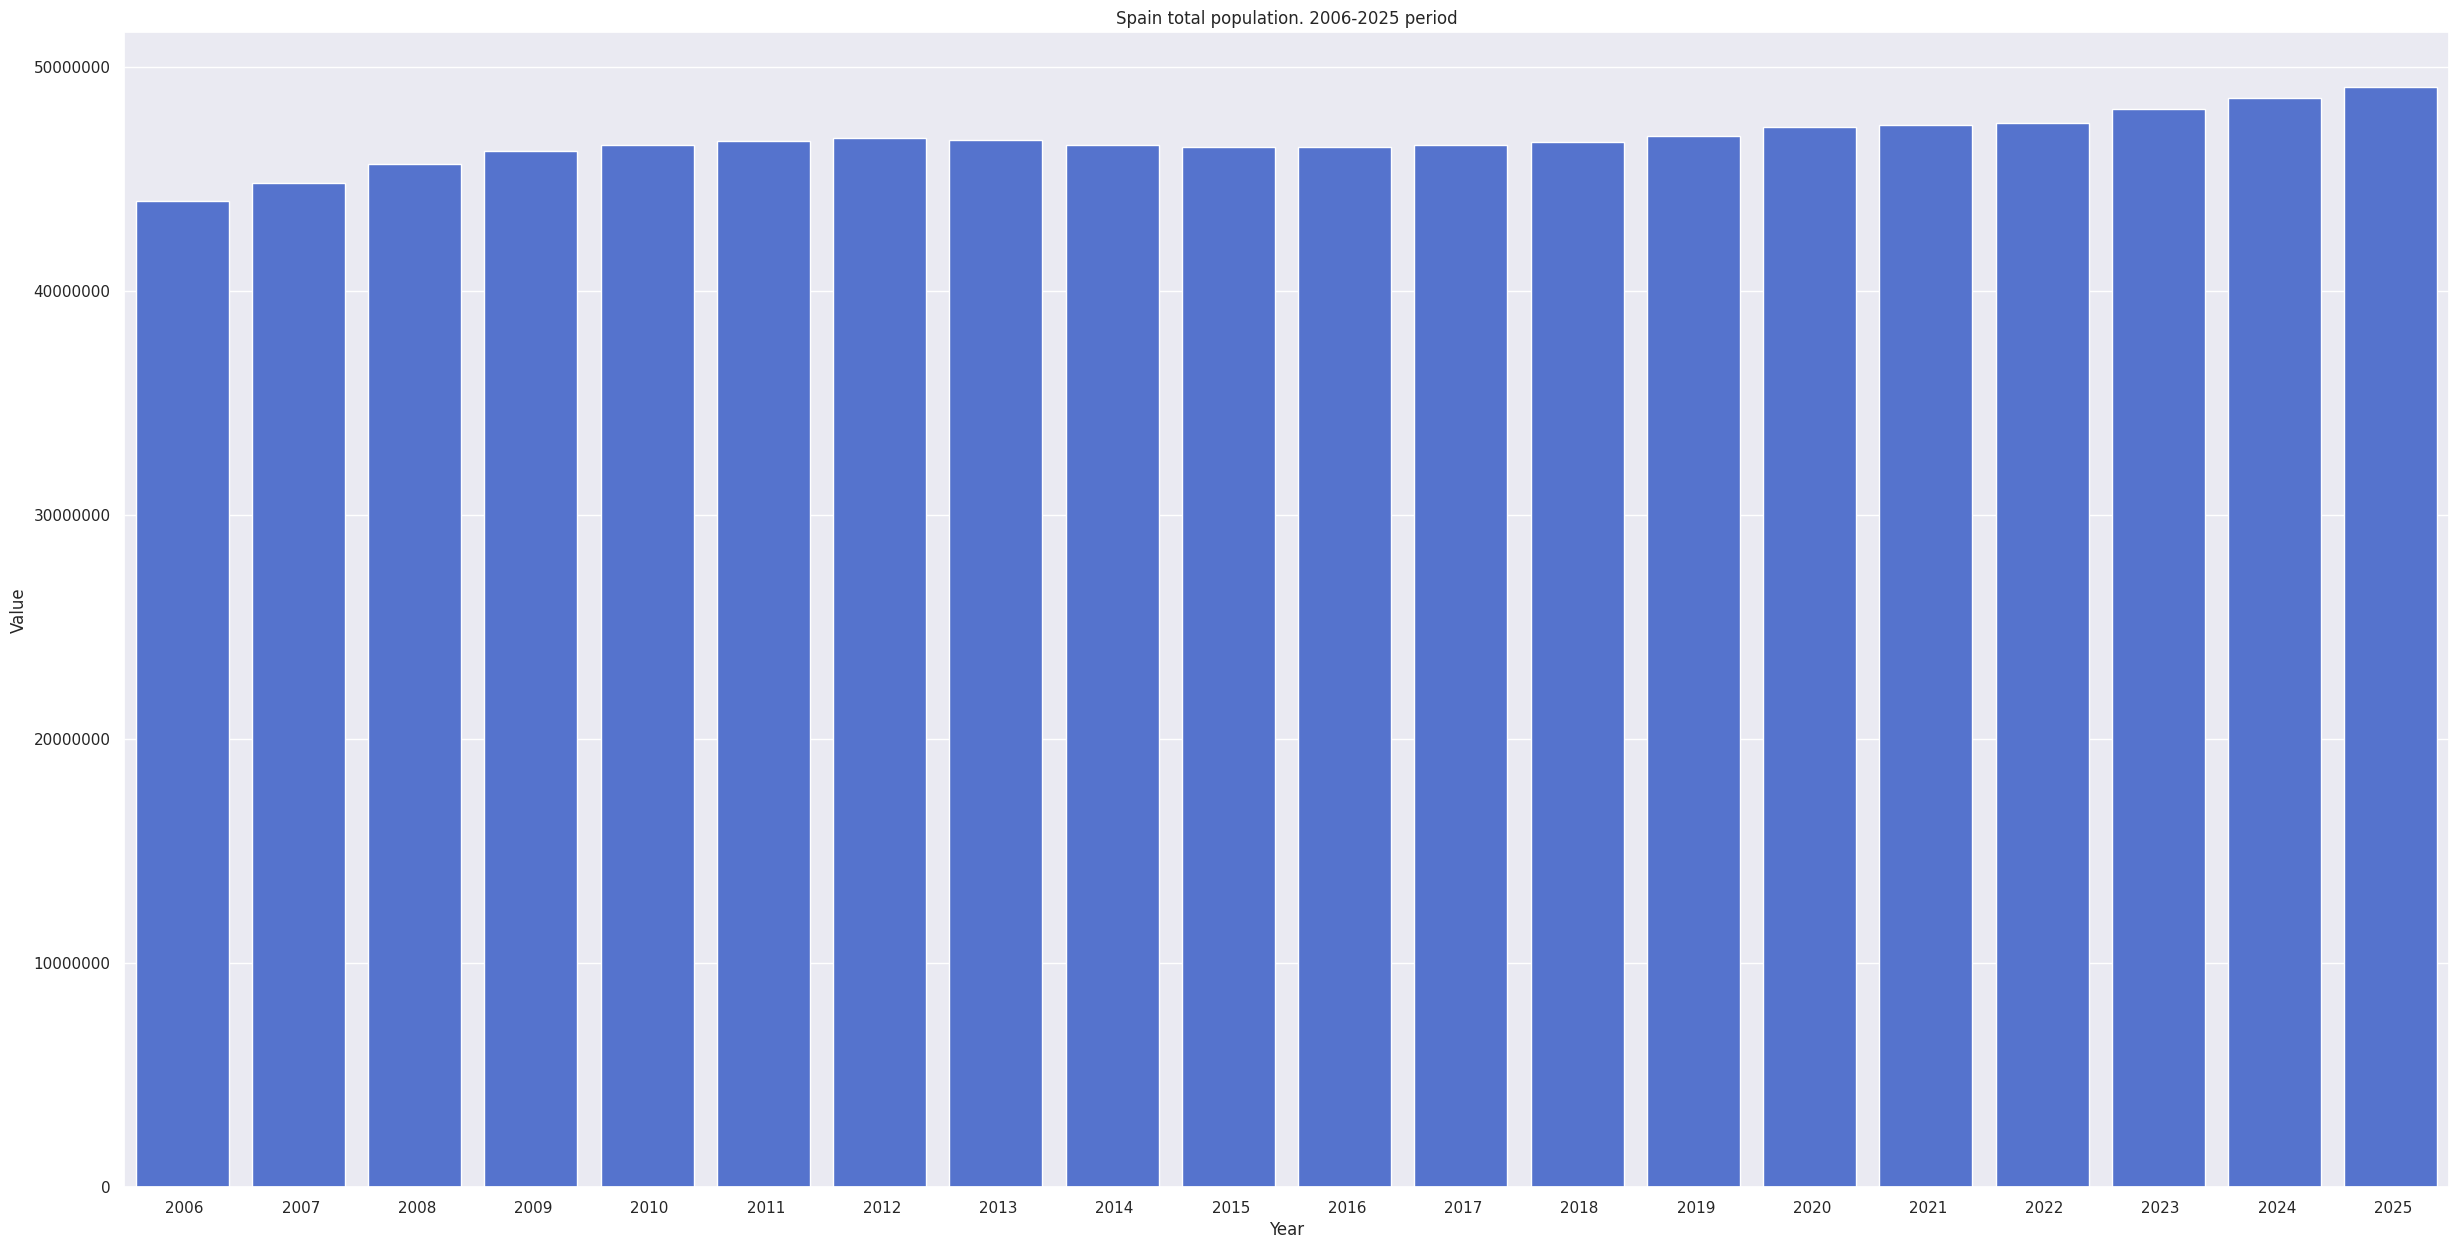

In [31]:
sns.set_theme()
fig = plt.figure(figsize = (30,15))
axs = fig.add_subplot(1,1,1)
Total_population = sns.barplot(x = 'Year', y = 'Value', data = total, color = 'royalblue').set_title("Spain total population. 2006-2025 period")
# Apply ScalarFormatter() function to remove scientific notation from Y axis
formatter = ScalarFormatter()
formatter.set_scientific(False)
axs.yaxis.set_major_formatter(formatter)
plt.savefig("Seaborn_gallery/Seaborn_plots/Spain total population 2005-2025.png",
bbox_inches = 'tight')
plt.show()

### 7.2 Calculation 02. Spanish nationals share of total population by year  